<a href="https://colab.research.google.com/github/salazarmaria/Notas-de-IA/blob/main/predicci%C3%B3n_de_la_eficiencia_del_combustible/notas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo #Instalo la librería ucimlrepo, que me permite descargar fácilmente bases de datos del repositorio


In [ ]:
from ucimlrepo import fetch_ucirepo  #

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

X.head()
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [ ]:
X.head() #Muestro las primeras filas de los datos

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [ ]:
X.info() # veo información general del DataFrame, como los tipos de datos y si hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [ ]:
import pandas as pd # Uno X y y en un solo DataFrame y elimino las filas con datos faltantes para que el conjunto quede limpio

df = pd.concat([X, y], axis=1).dropna()

In [ ]:
df.info() # Primero verifico cuántas filas y columnas tiene el DataFrame limpio

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [ ]:
df.describe() # veo un resumen estadístico (promedio, mínimo, máximo, etc.) de las variables

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,194.411990,5.471939,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,104.644004,1.705783,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,105.000000,4.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,151.000000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,275.750000,8.000000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [ ]:
X = df.drop('mpg', axis=1) # Dejo las columnas con características del auto en X y la columna 'mpg' (rendimiento) en y, ya que es la que quiero predecir
y = df['mpg']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)
# me permite entrenar el modelo con una parte y luego evaluar qué tan bien predice con datos nuevos

In [ ]:
print(X_train.shape) # Muestro cuántas filas hay en cada conjunto, para asegurarme de que la división se hizo correctamente.
print(X_test.shape)


(313, 7)
(79, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
import tensorflow as tf # Creo una red neuronal con tres capas ocultas
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],
)


Error cuadratico medio

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
) # Entreno el modelo con los datos de entrenamiento durante 5 epocas


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 366.9495 - root_mean_squared_error: 18.8540 - val_loss: 19.0304 - val_root_mean_squared_error: 4.3624
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 17.0592 - root_mean_squared_error: 4.1159 - val_loss: 13.9786 - val_root_mean_squared_error: 3.7388
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.7230 - root_mean_squared_error: 2.8869 - val_loss: 11.2779 - val_root_mean_squared_error: 3.3583
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.1350 - root_mean_squared_error: 3.0170 - val_loss: 12.0320 - val_root_mean_squared_error: 3.4687
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.9339 - root_mean_squared_error: 3.1358 - val_loss: 10.7858 - val_root_mean_squared_error: 3.2842


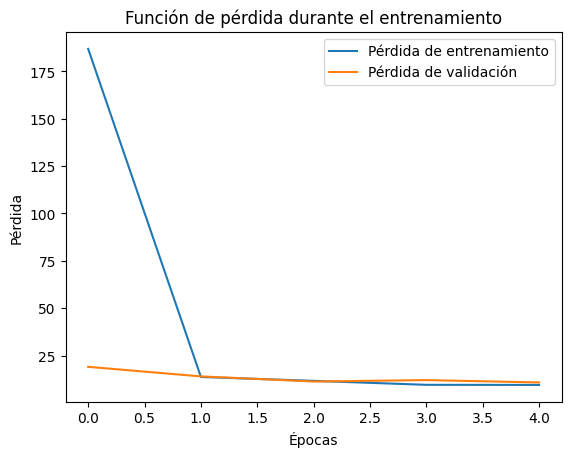

In [ ]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()
# gráfica que muestra cómo va disminuyendo el error en cada epoca

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}') #


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.4241 - root_mean_squared_error: 3.2264
Test Mean Absolute Error: 3.28


In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}') # Evalúo el modelo con los datos de prueba y muestro el error, que indica en promedio cuánto se equivoca el modelo al predecir.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.4241 - root_mean_squared_error: 3.2264
Test Mean Absolute Error: 3.28


In [ ]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head()) # Uso el modelo para predecir el rendimiento de combustible de los autos


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
     Actual  Predicted
82     23.0  20.820923
167    29.0  26.429558
356    32.4  33.332478
120    19.0  17.023878
385    38.0  37.765369


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


R²: 0.8444107791741323
MSE: 10.785798796131074
